Goal: Model stationary sample average bandit problem with 10 arms – the "10 armed testbed" problem described in Sutton and Barto, as shown below.

![Goal](../img/stationary_10_arm.png)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
# arms
k = 10
# generate action values
q_star = np.random.normal(0, 1, k)

In [3]:
# initialize estimated action values and num of times action taken
def init_vals():
    Q = []
    N = []
    for i in range(k):
        Q.append(0)
        N.append(0)
    return Q, N

In [4]:
# reward for an action
def bandit(action):
    return np.random.normal(q_star[action], 1)

In [5]:
# runs a bandit problem
# returns action values and % of time optimal action picked
def sample_avg(iterations, epsilon):
    Q, N = init_vals()
    optimal = np.argmax(q_star)
    optimal_ct = 0
    total_reward = 0
    for i in range(iterations):
        # choose to explore or exploit
        rand = np.random.rand()
        if rand < (1 - epsilon):
            action = np.argmax(Q)
        else:
            action = int(np.floor(np.random.rand() * 10))
        reward = bandit(action)
        total_reward += reward
        N[action] = N[action] + 1
        Q[action] = Q[action] + (1 / N[action]) * (reward - Q[action])
        if action == optimal:
            optimal_ct += 1
    return Q, (optimal_ct / iterations), (total_reward / iterations)

In [6]:
# generate optimal action %s for iterations up to 2000
steps = []
opt_pct = []
avg_reward = []
for i in range(1, 2000):
    Q, opt, reward = sample_avg(i, 0.1)
    steps.append(i)
    opt_pct.append(opt)
    avg_reward.append(reward)

In [7]:
opt_pct_1 = []
avg_reward_1 = []
for i in range(1, 2000):
    Q, opt, reward = sample_avg(i, 0.01)
    opt_pct_1.append(opt)
    avg_reward_1.append(reward)

In [8]:
opt_pct_2 = []
avg_reward_2 = []
for i in range(1, 2000):
    Q, opt, reward = sample_avg(i, 0.0)
    opt_pct_2.append(opt)
    avg_reward_2.append(reward)

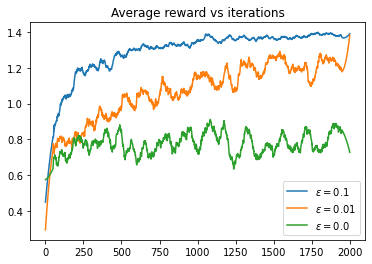

In [15]:
# _,opt = sample_avg(1000, 0)
# opt
avg_reward_smooth = savgol_filter(avg_reward, 101, 2)
avg_reward_1_smooth = savgol_filter(avg_reward_1, 101, 2)
avg_reward_2_smooth = savgol_filter(avg_reward_2, 101, 2)

plt.plot(steps, avg_reward_smooth, label=r'$\epsilon = 0.1$')
plt.plot(steps, avg_reward_1_smooth, label=r'$\epsilon = 0.01$')
plt.plot(steps, avg_reward_2_smooth, label=r'$\epsilon = 0.0$')
plt.title('Average reward vs iterations')
plt.legend()

We can see this looks very similar to the graph above, and assuming we kept iterating after 2000,
orange would achieve higher average reward than blue because of greater exploitation.

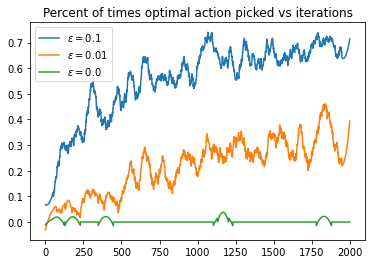

In [16]:
opt_pct_smooth = savgol_filter(opt_pct, 101, 2)
opt_pct_1_smooth = savgol_filter(opt_pct_1, 101, 2)
opt_pct_2_smooth = savgol_filter(opt_pct_2, 101, 2)

plt.plot(steps, opt_pct_smooth, label=r'$\epsilon = 0.1$')
plt.plot(steps, opt_pct_1_smooth, label=r'$\epsilon = 0.01$')
plt.plot(steps, opt_pct_2_smooth, label=r'$\epsilon = 0.0$')
plt.title('Percent of times optimal action picked vs iterations')
plt.legend()
